<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/Stats_Inclass_my_labexercise_Day03_QuestionNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA and Chi Square 

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [4]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

In [139]:
adf = pd.DataFrame()
df1  = pd.DataFrame({'life_type': 'A', 'life':life_type_A})
df2  = pd.DataFrame({'life_type': 'B', 'life':life_type_B})
df3  = pd.DataFrame({'life_type': 'C', 'life':life_type_C})

adf = adf.append(df1) 
adf = adf.append(df2) 
adf = adf.append(df3) 
adf

,life_type,life
0,A,407
1,A,411
2,A,409
0,B,404
1,B,406
2,B,408
3,B,405
4,B,402
0,C,410
1,C,408


### a)  Plot box plot for the above data and write your inference on the group means from the boxplots.

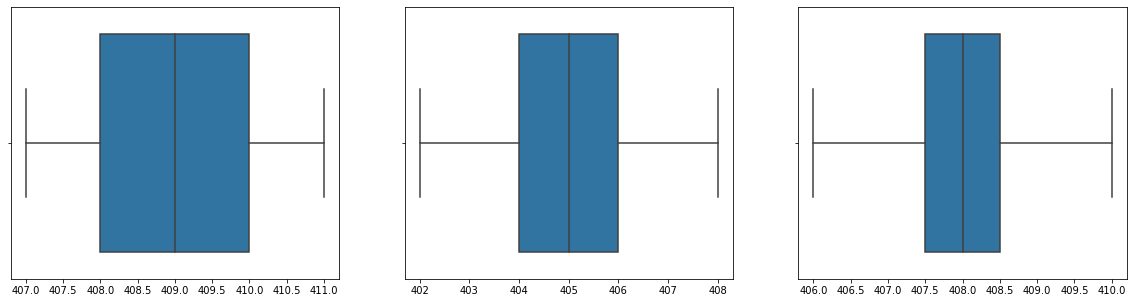

In [43]:
fig, axes= plt.subplots(1,3, figsize=(20, 5))
sns.boxplot(life_type_A, ax=axes[0])
sns.boxplot(life_type_B, ax=axes[1])
sns.boxplot(life_type_C, ax=axes[2])
plt.show()

In [119]:
print(np.mean(life_type_A))
print(np.mean(life_type_B))
print(np.mean(life_type_C))

409.0
405.0
408.0


mean of life_type_A is 409, life_type_B is 405 and life_type_C is 408

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [99]:
# Null hypothesis- they have same average lifetimes

f_oneway(life_type_A, life_type_B, life_type_C)

# since p value is less than 0.05, they dont have similar average lifetimes. 

F_onewayResult(statistic=4.5, pvalue=0.04419417382415922)

### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In [136]:
import statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

NULL hypothesis

1. lifetime a = lifetime b
2. lifetime b = lifetime c
3. lifetime c = lifetime a

Alternate hypothesis: 
Each of them have different means of lifetime

In [142]:
mc1= pairwise_tukeyhsd(adf['life'], adf['life_type'], alpha=0.05)
print(mc1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -4.0 0.0541 -8.0746 0.0746  False
     A      C     -1.0 0.7824 -5.2613 3.2613  False
     B      C      3.0 0.1177 -0.7427 6.7427  False
---------------------------------------------------


In [ ]:
# Based on Honestly Significant T test between each samples, we fail to reject null hypothesis. 

### Practice Exercise 2

### A sample of number of sell of a particular product over different days in different stores have been collected.Perform a test to check whether different stores and different days have any effect on the number of products that have been sold.

In [83]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [109]:

headers = ['Day','Store_A','Store_B','Store_C','Store_D','Store_E'] #

df1 = pd.DataFrame(table1, columns=headers)
df1

,Day,Store_A,Store_B,Store_C,Store_D,Store_E
0,2,68,76,79,87,76
1,3,71,77,74,84,72
2,4,70,73,71,78,73
3,5,60,64,67,79,58


In [128]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Day ~ Store_A'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)

print(aov_table)

           df    sum_sq   mean_sq         F    PR(>F)
Store_A   1.0  2.090301  2.090301  1.436782  0.353424
Residual  2.0  2.909699  1.454849       NaN       NaN


In [129]:
formula = 'Day ~ Store_B'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)

print(aov_table)

           df    sum_sq   mean_sq    F    PR(>F)
Store_B   1.0  3.809524  3.809524  6.4  0.127128
Residual  2.0  1.190476  0.595238  NaN       NaN


In [130]:
formula = 'Day ~ Store_C'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)

print(aov_table)

           df    sum_sq   mean_sq           F    PR(>F)
Store_C   1.0  4.954397  4.954397  217.285714  0.004571
Residual  2.0  0.045603  0.022801         NaN       NaN


In [131]:
formula = 'Day ~ Store_D'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)

print(aov_table)

           df    sum_sq   mean_sq     F    PR(>F)
Store_D   1.0  4.166667  4.166667  10.0  0.087129
Residual  2.0  0.833333  0.416667   NaN       NaN


In [132]:
formula = 'Day ~ Store_E'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)

print(aov_table)

           df   sum_sq  mean_sq         F    PR(>F)
Store_E   1.0  3.64332  3.64332  5.370937  0.146382
Residual  2.0  1.35668  0.67834       NaN       NaN


## We can see that effect of days is significant in store C, the rest of the store has no effect from days

## Chi Square

### Practice Exercise 3

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [81]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()


Null hypothesis:  H0 : Meal preference is as per the perceived ratios of the operations manager

Alternative hypothesis:  HA : Meal preference is different from the perceived ratios of the operations manager



In [82]:
n= 500
expected_values    = np.array([n*0.3, n*.45, n*0.2, n*0.05])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.0000449


p value is 0.0000449 and < 0.05 so we reject the null hypothesis, 
## Meal preference is different from the perceived ratios of the operations manager

### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [45]:
import numpy as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])

Null hypothesis:  H0 : There is no difference in Customer Segment

Alternative hypothesis:  HA : There is a significant difference in Customer Segment

In [77]:
# we use a Chi square test.

stats.chi2_contingency(churn_array)

(2.779977047087869, 0.24907816314986156, 2, array([[ 10.833, 146.167],
        [ 29.256, 394.744],
        [ 28.911, 390.089]]))

since p value is more than 0.05, we fail to reject the null hypothesis. 
there is indeed no difference in Customer Segment

## E N D  